In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df=pd.read_csv(r"E:\Drive F\ML datasets\Bank marketing data\bank-full.csv")
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


No missing data.

In [4]:
df['y']=(df['y']=='yes').astype(int)

*Visualization of some important aspects within the data.*

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

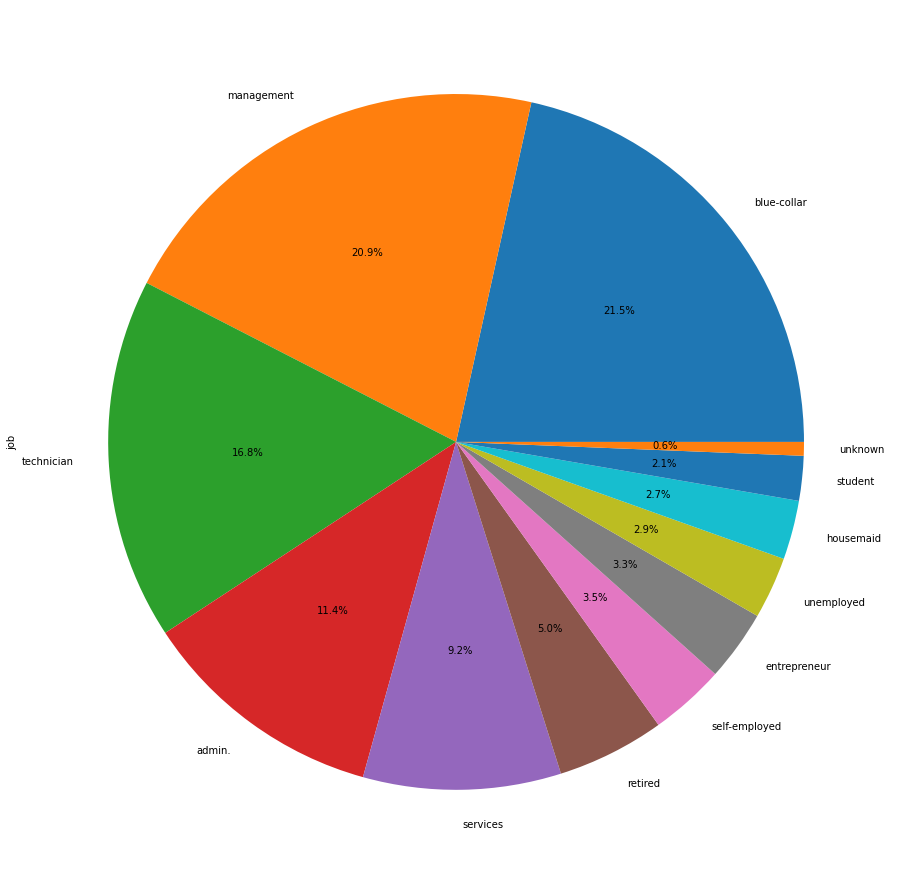

In [6]:
plt.figure(figsize=(20,16))
df['job'].value_counts().plot.pie(autopct='%1.1f%%')

**Blue-collar,Management and Technicians constitutes 60% percent of the population .**

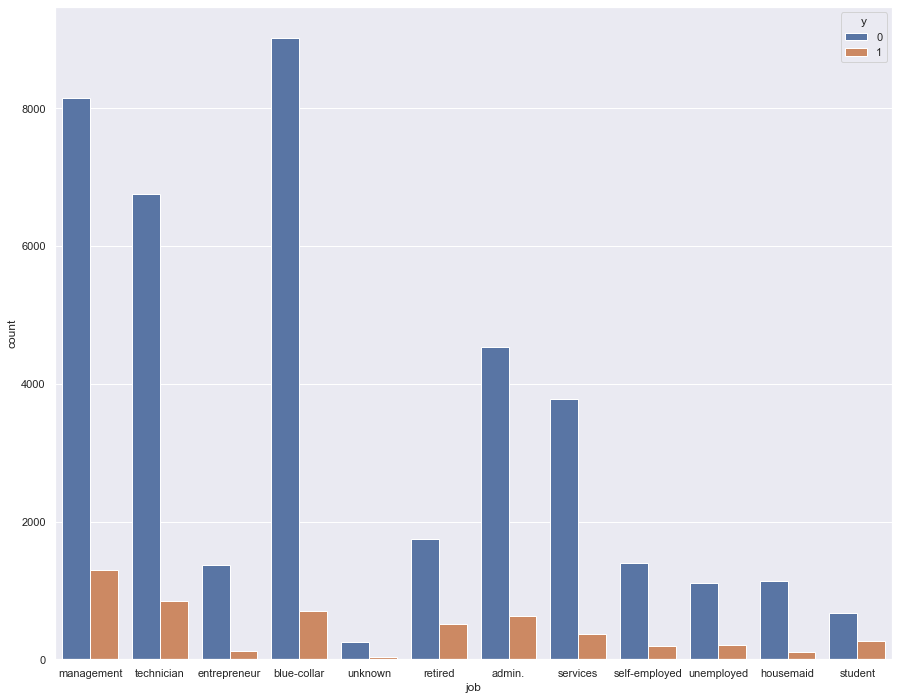

In [7]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,12))
sns.countplot(df['job'],hue='y',data=df)
plt.show()

<Figure size 1152x864 with 0 Axes>

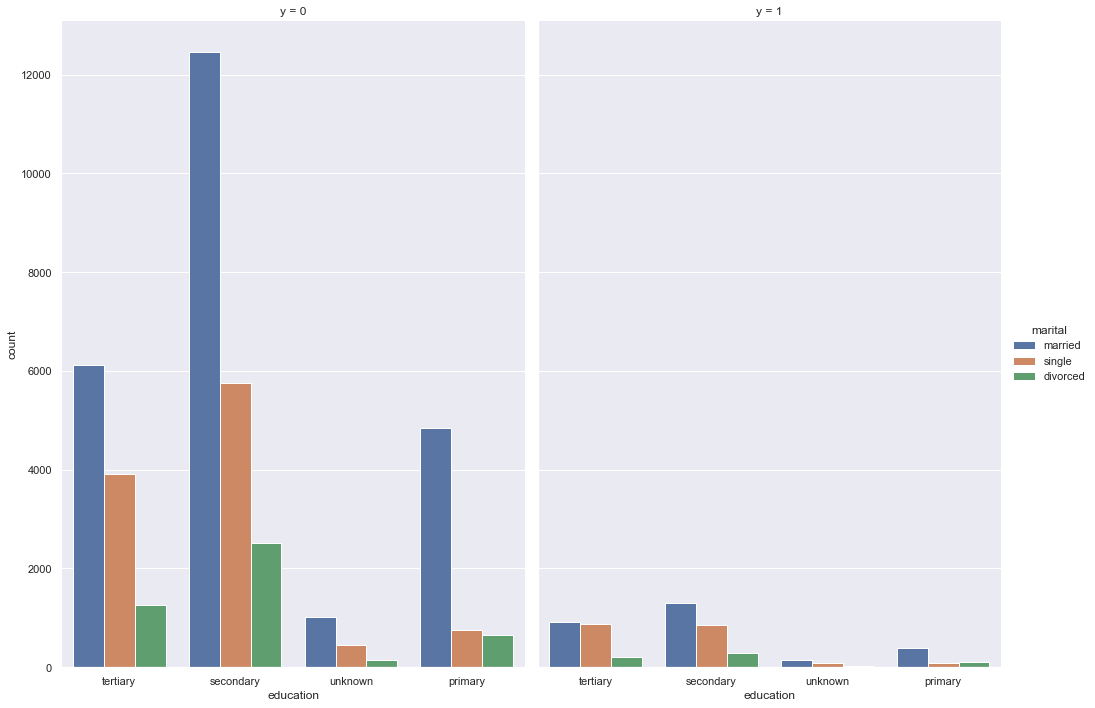

In [8]:
sns.set(style="darkgrid")
plt.figure(figsize=(16,12))
sns.catplot(x="education", hue="marital", col="y",
                data=df, kind="count",
                height=10, aspect=.7);
plt.show()

In [9]:
df['y'].value_counts()/df.shape[0]

0    0.883015
1    0.116985
Name: y, dtype: float64

**As it can be seen,the dataset is too much skewed.Only 11.7% of total population of the dataset has subscribed for the deposit.**

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


**Let's detect outliers in the numerical features in the dataset.We will denote that values as outliers which are atleast 3 standard deviations away from mean**

In [11]:
numerical_features=(df.select_dtypes(exclude=['object'])).columns
numerical_features=list(numerical_features)

# drop the target variable 'y'
numerical_features.remove('y')

In [12]:
for features in numerical_features:
    mean=df[features].mean(axis=0)
    std=df[features].std(axis=0)
    upper_thres=mean+3*std
    lower_thres=mean-3*std
    outliers=0
    for i in range(df.shape[0]):
        if df[features].iloc[i]>=upper_thres or  df[features].iloc[i]<=lower_thres:
            outliers+=1
    print("{features}->>  outliers: {outlier}".format(features=features,outlier=outliers))

age->>  outliers: 381
balance->>  outliers: 745
day->>  outliers: 0
duration->>  outliers: 963
campaign->>  outliers: 840
pdays->>  outliers: 1723
previous->>  outliers: 582


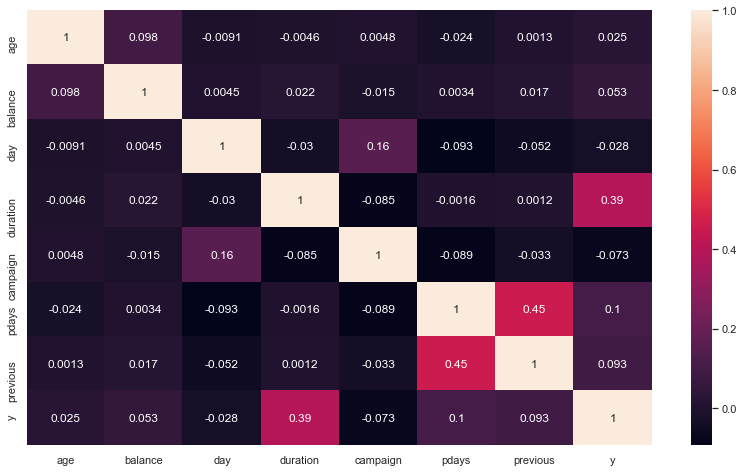

In [13]:
corr=df.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True)

**Most of the numerical features except duration are uncorrelated.The target perhaps is much dependent on the categorical features or the relationships are non-linear.**

In [14]:
# Day and month columns appear to be uncorrelated.
df['month'][df['y']==1].value_counts()

may    925
aug    688
jul    627
apr    577
jun    546
feb    441
nov    403
oct    323
sep    269
mar    248
jan    142
dec    100
Name: month, dtype: int64

In [15]:
df['month'][df['y']==0].value_counts()

may    12841
jul     6268
aug     5559
jun     4795
nov     3567
apr     2355
feb     2208
jan     1261
oct      415
sep      310
mar      229
dec      114
Name: month, dtype: int64

In [16]:
import warnings
warnings.simplefilter("ignore")


subscribers_w_loan=df[df['loan']=='yes'][df['y']==1].shape[0]
subscribers_wo_loan=df[df['loan']=='no'][df['y']==1].shape[0]

subscribers=df[df['y']==1]

print("subscribers_w_loan ->>",subscribers_w_loan/subscribers.shape[0])
print("\n")
print("subscribers_wo_loan ->>",subscribers_wo_loan/subscribers.shape[0])

subscribers_w_loan ->> 0.09151068254868595


subscribers_wo_loan ->> 0.908489317451314


**90% subscribers are without loan**.

# Another very crucial aspect is the mode of communication.
 

In [17]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

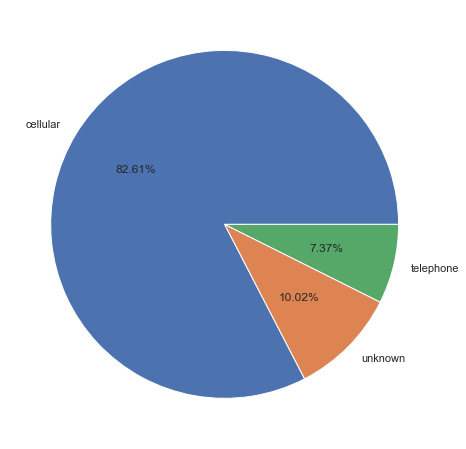

In [18]:
# subscribers who are contacted by various modes.
cellular=0
unknown=0
telephone=0
for x in range(df.shape[0]):
    if df['y'].iloc[x]==1:
        if df['contact'].iloc[x]=='cellular':
            cellular+=1
        if df['contact'].iloc[x]=='unknown':
            unknown+=1
        if df['contact'].iloc[x]=='telephone':
            telephone+=1


plt.figure(figsize=(15,8))
contacts = ['cellular', 'unknown', 'telephone']
sizes = [cellular,unknown,telephone]
plt.pie(sizes, labels = contacts,autopct='%1.2f%%')
plt.show()

**Most of the people who subscribed were contacted via cellular mode(82.61%).

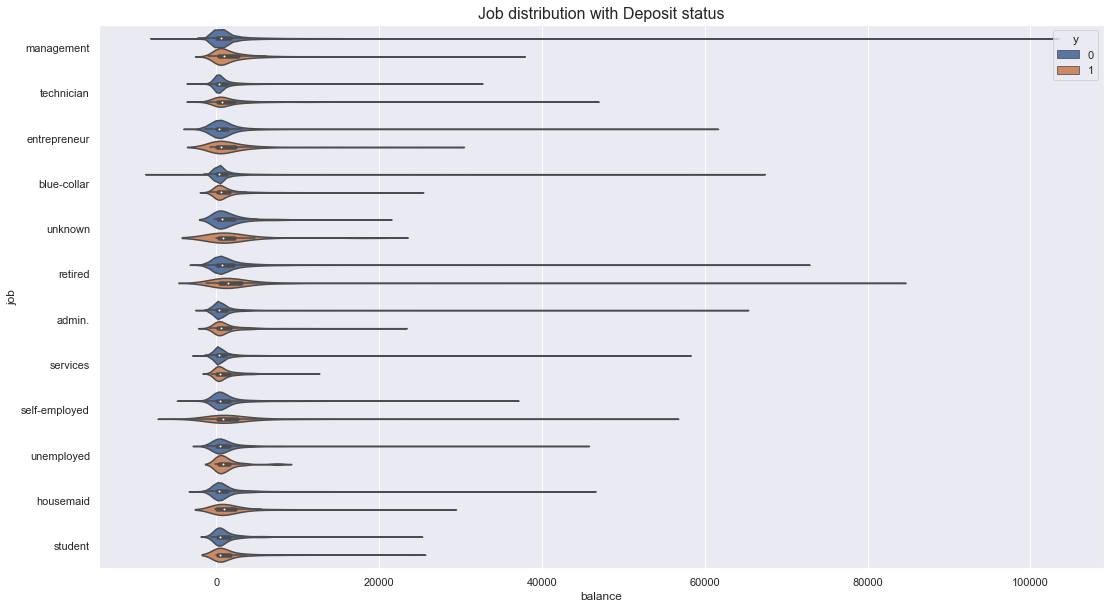

In [19]:
plt.figure(figsize=(18,10))
sns.violinplot(x="balance",y="job",hue='y',data=df)
plt.title("Job distribution with Deposit status",fontsize=16)
plt.show()

In [20]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
23       22
25       22
24       20
28       16
29       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
41        2
50        2
37        2
51        1
55        1
46        1
58        1
44        1
39        1
63        1
Name: campaign, dtype: int64

**Most of the population is targeted in the first 10 campaigns.**

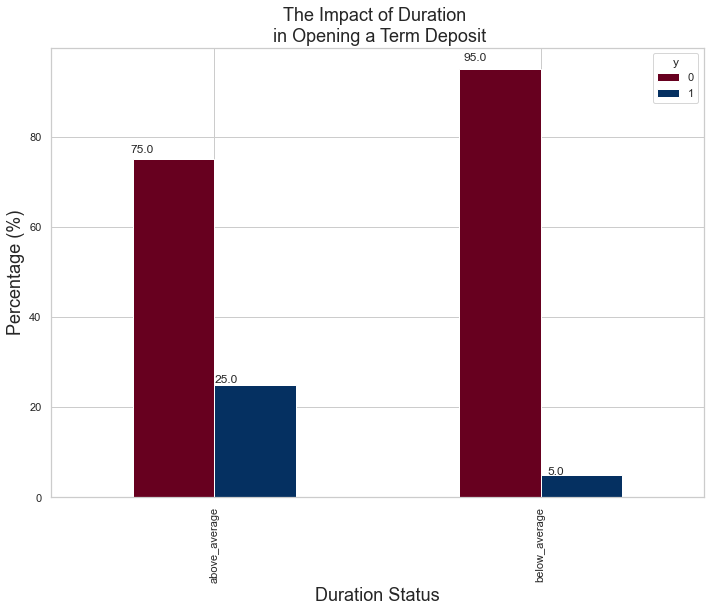

In [21]:
# Duration of the campaign also plays a great role,has a good correlation with deposit subscription.

# this code snippet is forked.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

**Above average duration has clearly a greater impact than below average(25% over 5%).**

# Has the previous marketing campaign has any impact on this campaign??

In [22]:
df['poutcome'].value_counts()    

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

*But sadly,this data is not reliable as most of the previous campaign outcomes are unknown.

<Figure size 1080x576 with 0 Axes>

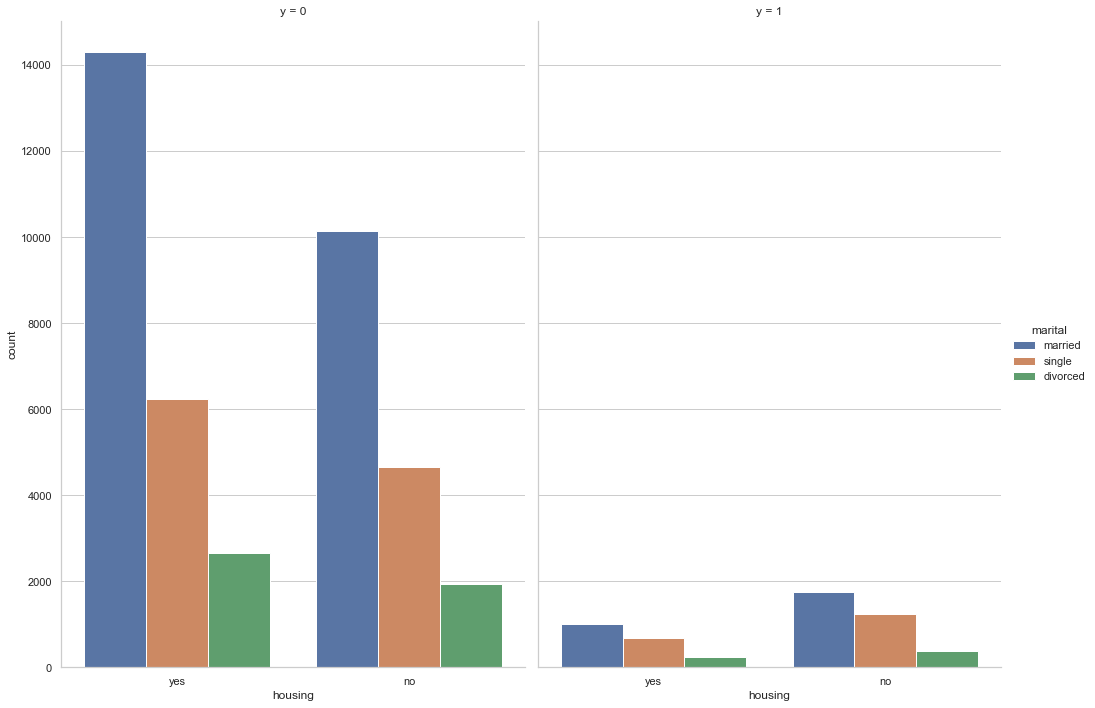

In [23]:
# housing with marital status
plt.figure(figsize=(15,8))
sns.catplot(x="housing", hue="marital", col="y",
                data=df, kind="count",
                height=10, aspect=.7);
plt.show()

*Let us see the distribution of pdays and previous in the population*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002139AB9C460>]],
      dtype=object)

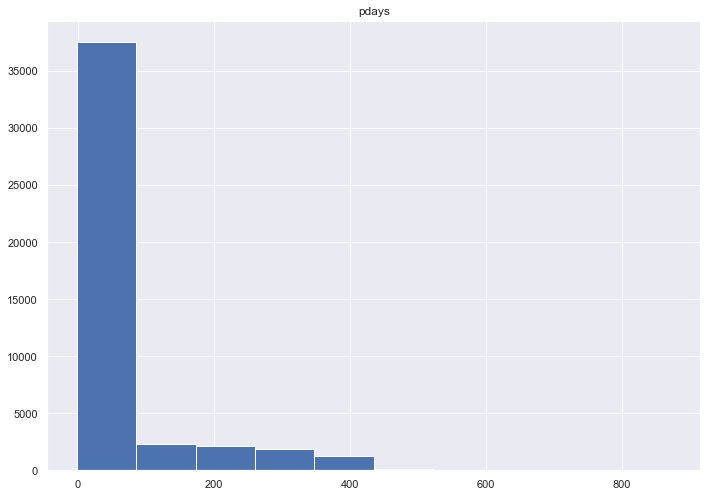

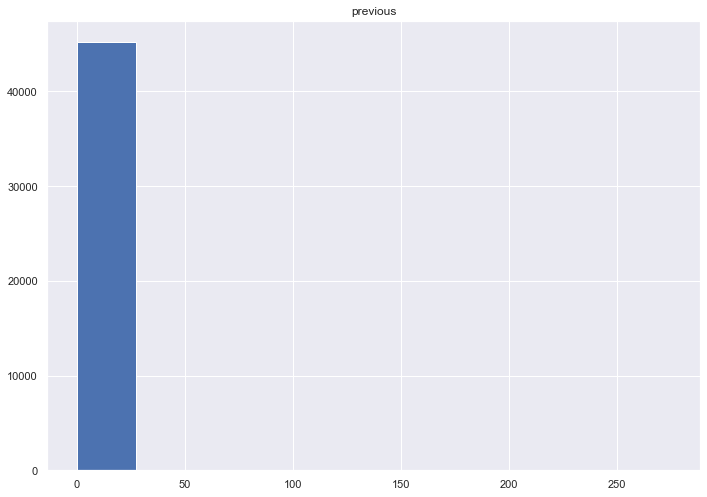

In [50]:
df.hist(column='pdays')
df.hist(column='previous')

# Let us do combination of features with boxplots.

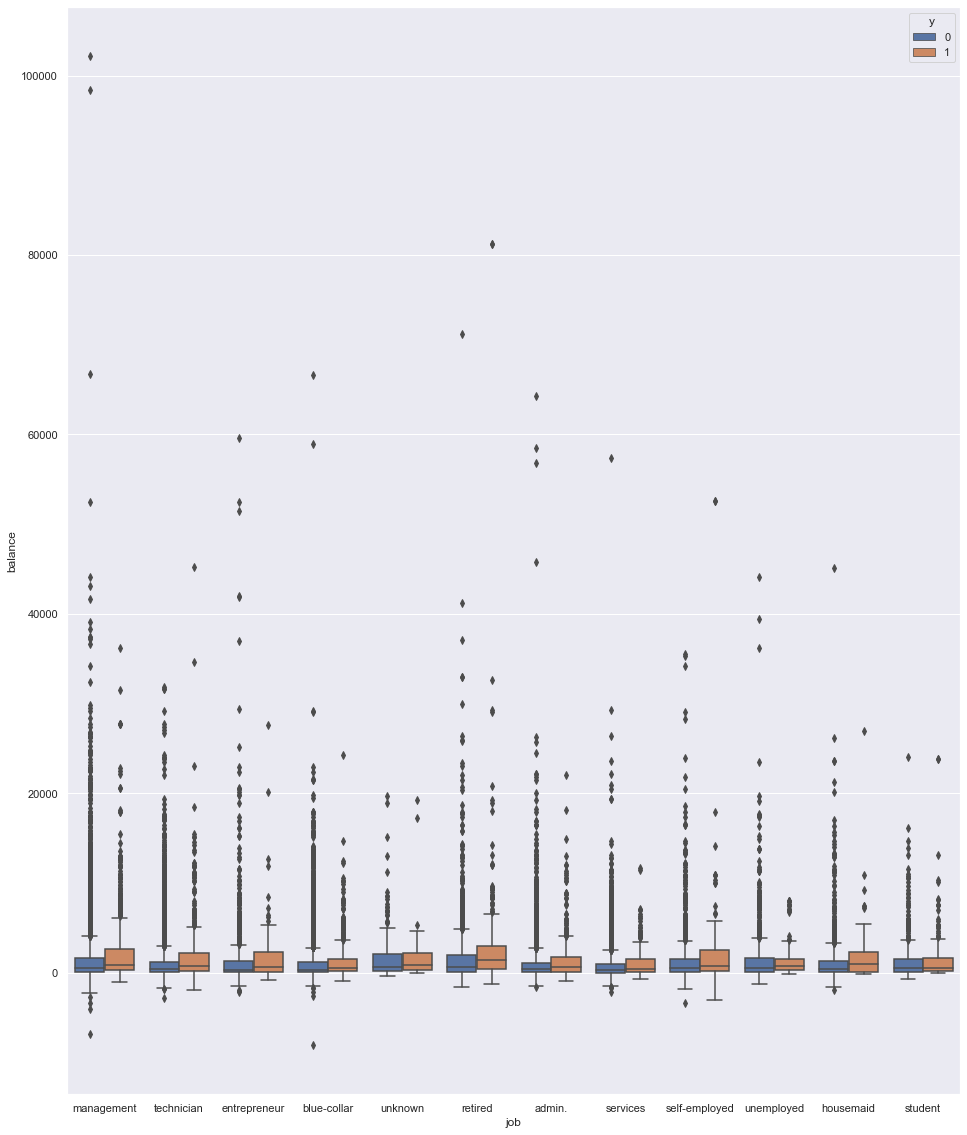

In [39]:
plt.figure(figsize=(16,20))
sns.set_style("darkgrid")
sns.boxplot(x='job',y='balance',data=df,hue='y',whis=1.5)
plt.show()

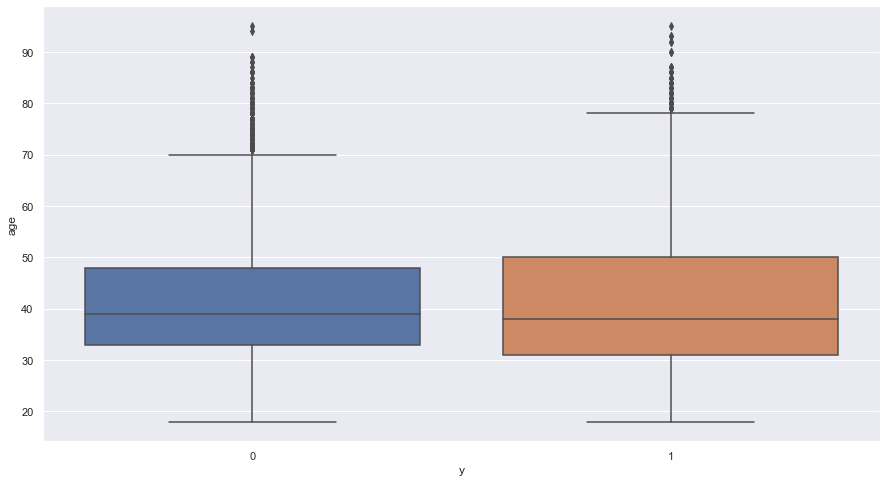

In [44]:
plt.figure(figsize=(15,8))
sns.set_style("darkgrid")
sns.boxplot(x='y',y='age',data=df,whis=1.5)
plt.show()

In [46]:
# drop irrelevant features
df=df.drop(['day','month','poutcome'],axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,y,duration_status
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,0,above_average
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,0,below_average
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,0,below_average
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,0,below_average
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,0,below_average
